orgin：https://blog.csdn.net/weixin_42001089/article/details/79951166

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.externals import joblib
import pandas as pd
import matplotlib as mpl
from scipy.spatial.distance import cdist
from sklearn import metrics     

 读取数据


In [8]:
X = []  
f = open('files/data/python80/city.txt',encoding='utf-8')  
for v in f:
    X.append([float(v.split(',')[1]),float(v.split(',')[2])])
f.close()

In [10]:
X[:10]

[[121.48, 31.22],
 [121.24, 31.4],
 [121.48, 31.41],
 [121.7, 31.19],
 [121.76, 31.05],
 [121.46, 30.92],
 [121.24, 31.0],
 [102.73, 25.04],
 [102.48, 25.21],
 [102.58, 24.68]]

In [11]:
# 转换为numpy数组

In [13]:
X=np.array(X)

In [15]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']            #绘图时用来正常显示中文标签    
mpl.rcParams['axes.unicode_minus'] = False               #绘图时用来正常显示负号

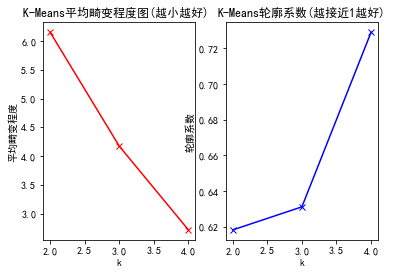

In [16]:

n_clusters = range(2,5) #假设分别在2,3,4中选取一个最合适的n_clusters
meandistortions=[]
metrics_silhouette=[]
for k in n_clusters:
    clf=KMeans(n_clusters=k)
    cls = clf.fit(X)
    meandistortions.append(sum(np.min(cdist(X,clf.cluster_centers_,'euclidean'),axis=1))/X.shape[0])#平均畸变程度值，越小越好
    metrics_silhouette.append(metrics.silhouette_score(X,clf.labels_,metric='euclidean'))           #轮廓系数,越接近1越好   
#平均畸变程度图   
plt.subplot(121)
plt.plot(n_clusters,meandistortions,'rx-')
plt.xlabel('k')
plt.ylabel('平均畸变程度')
plt.title('K-Means平均畸变程度图(越小越好) ')
#轮廓系数图
plt.subplot(122)
plt.plot(n_clusters,metrics_silhouette,'bx-')
plt.ylabel('轮廓系数')
plt.xlabel('k')
plt.title('K-Means轮廓系数(越接近1越好)')
#显示
plt.show()


[2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2]
[[101.988       26.84833333]
 [126.09142857  44.1152381 ]
 [119.61631579  30.73157895]
 [112.75347826  39.21565217]]
979.8926593124119
0    30
3    23
1    21
2    19
dtype: int64
[2 1]


Text(0.5,1,'K-Means聚合结果(n_clusters=4)')

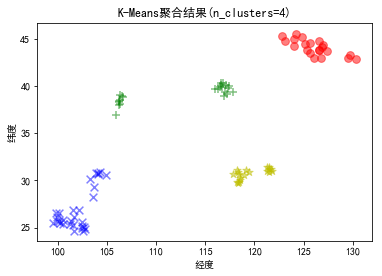

In [23]:

#模块二：
#核心代码:现在把数据和对应的分类放入聚类函数中进行聚类
#其中n_clusters 需要聚成几类，init代表初始点怎么找，max_iter代表迭代次数， n_jobs用的cpu，precompute_distances预先需不需要计算距离
n_clusters=4
clf=KMeans(n_clusters=n_clusters)
cls = clf.fit(X)
 
#聚类结果的显示,其中用clf和cls均可
print(cls.labels_)                         #显示每个样本所属的簇
print(clf.cluster_centers_)                #4个中心点的坐标
print(clf.inertia_)                        #用来评估簇的个数是否合适，代表所有点到各自中心的距离和，距离越小说明簇分的越好，选取临界点的簇个数
r1 = pd.Series(cls.labels_).value_counts()
print(r1)                                  #统计每个类别下样本个数
 
#用聚类的学习结果去预测
X1=[[121.35,26.41],[123.5,45.35]]
print(clf.predict(X1))
 
#保存模型，加载模型(加载后是类别标签)
joblib.dump(clf,'files/data/python80/km.txt')
clf = joblib.load('files/data/python80/km.txt')
 
#画图
markers = ['x','o','*','+']
colors=['b','r','y','g']
for i in range(n_clusters):
    members = cls.labels_ == i
#     print(X[members,0])
    plt.scatter(X[members,0],X[members,1],s=60,marker=markers[i],c=colors[i],alpha=0.5)
plt.xlabel('经度')
plt.ylabel('纬度')
plt.title('K-Means聚合结果(n_clusters=4)')  
